# House Price Prediction Using Linear Regression

#### **Objective**:
Build a predictive model using linear regression to estimate house prices based on relevant features in the dataset `Housing.csv`.

#### **1. Load the Dataset**
The first step is to load the dataset into a DataFrame using pandas. This allows us to manipulate and explore the data easily.

In [1]:
# Import libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Housing.csv')

# Display the first few rows of the dataset
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


#### **2. Exploratory Data Analysis (EDA)**
EDA helps us understand the dataset's structure, uncover patterns, and identify potential issues like missing values or outliers. 
This is a critical step to ensure high-quality data is used for model building.

##### **Dataset Overview**
This step provides a summary of the dataset, including data types, non-null counts, and a statistical overview of numerical features.

In [2]:
# Display dataset information
print(df.info())

# Summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

##### **Target Variable Distribution**
Understanding the distribution of the target variable (`price`) helps identify skewness or outliers that might affect the model.

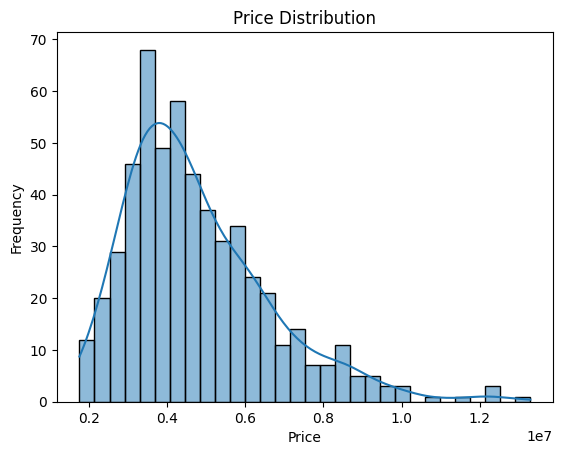

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of the target variable (price)
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

##### **Feature Distributions**
We analyze the distributions of numerical features to detect anomalies and ensure the data aligns with domain knowledge.

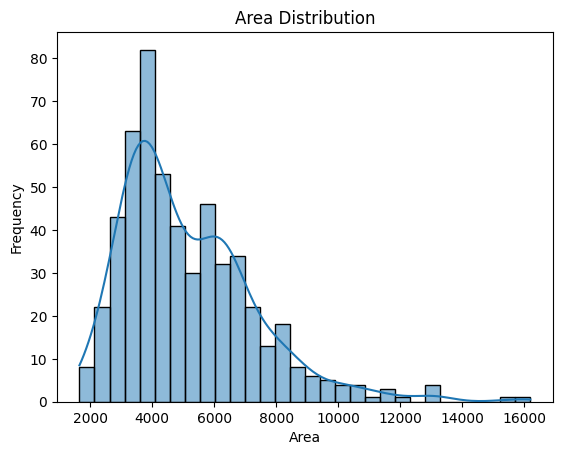

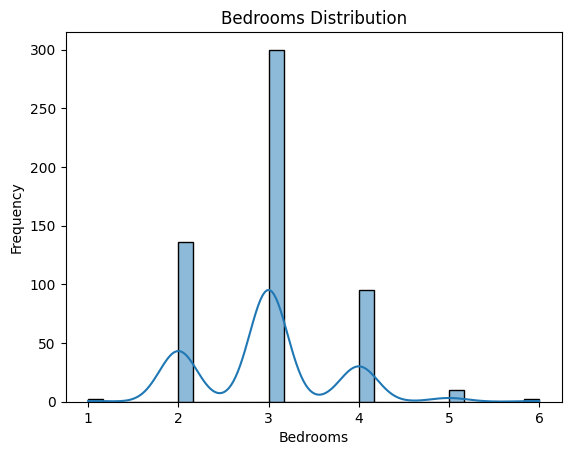

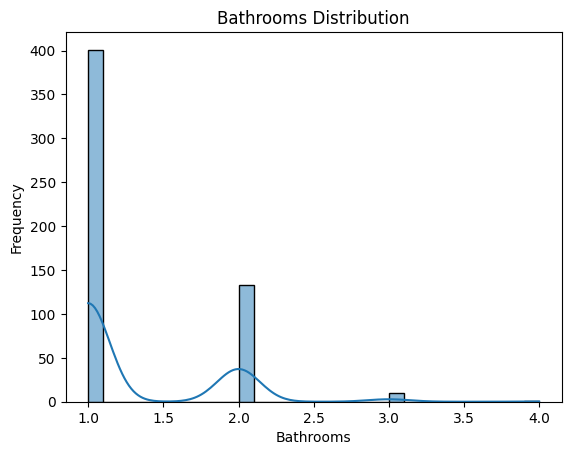

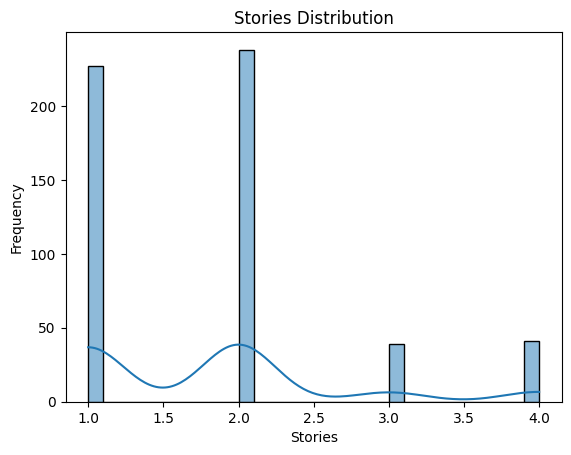

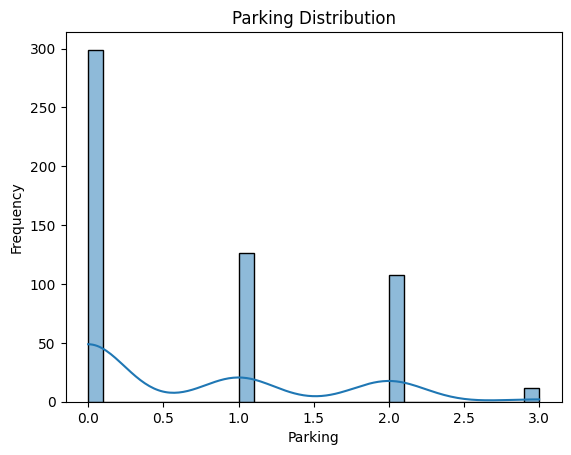

In [5]:
# Plot distribution for numerical features
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in numerical_columns:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.show()

##### **Correlation Analysis**
Correlation analysis helps identify relationships between features and the target variable. Features strongly correlated with the target are more likely to be useful for prediction.

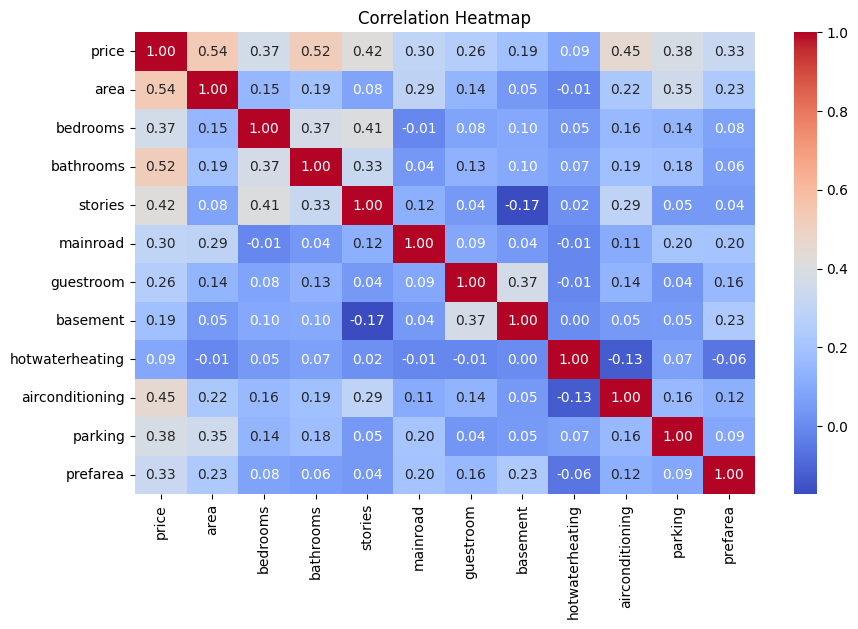

In [20]:
# Correlation heatmap

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##### **Relationships with Target Variable**
Visualizing relationships between numerical features and `price` gives insights into potential linear or non-linear dependencies.

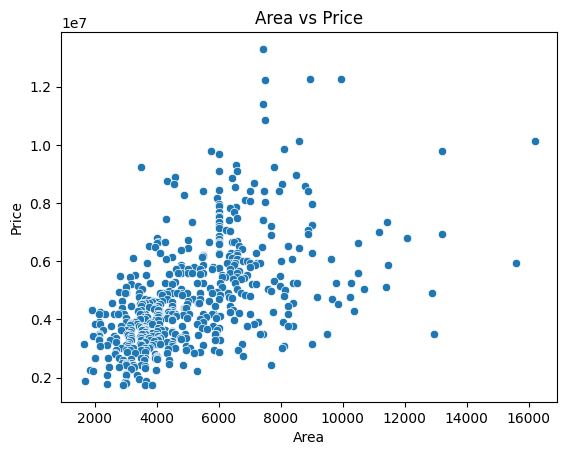

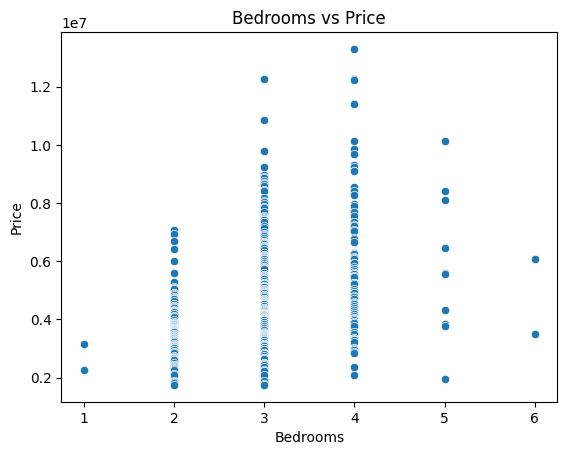

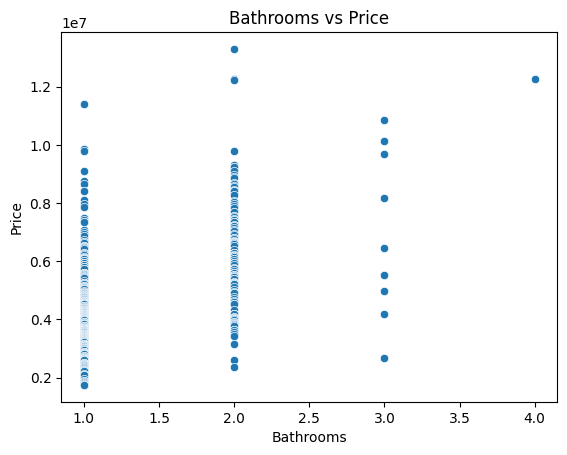

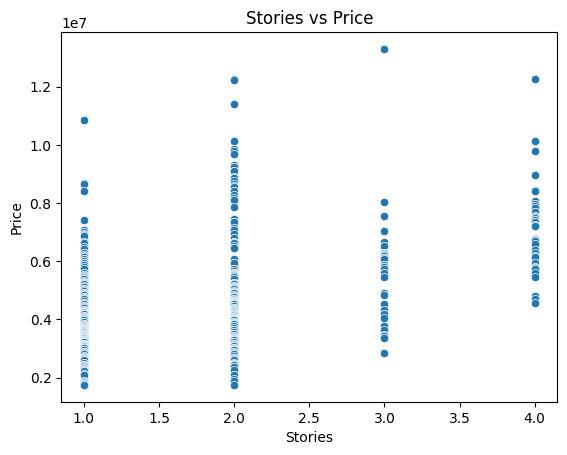

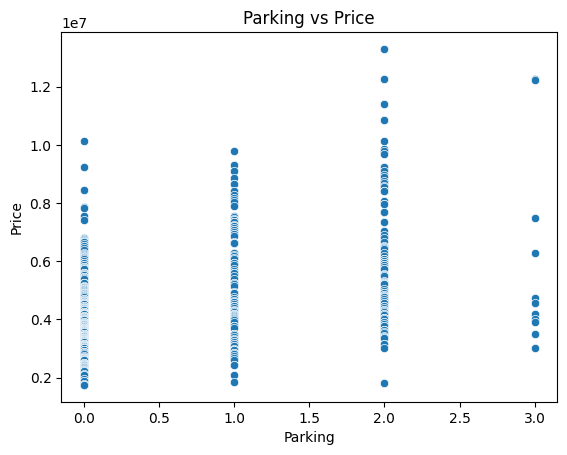

In [7]:
# Scatter plots for numerical features vs. price
for col in numerical_columns:
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'{col.capitalize()} vs Price')
    plt.xlabel(col.capitalize())
    plt.ylabel('Price')
    plt.show()

##### **Categorical Feature Analysis**
Categorical features are analyzed to understand their distribution and impact on the target variable.

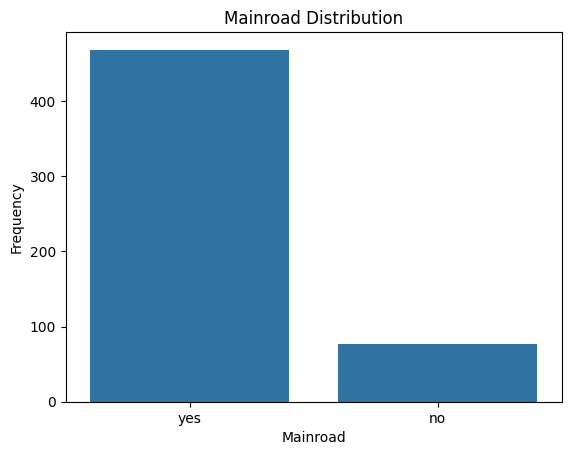

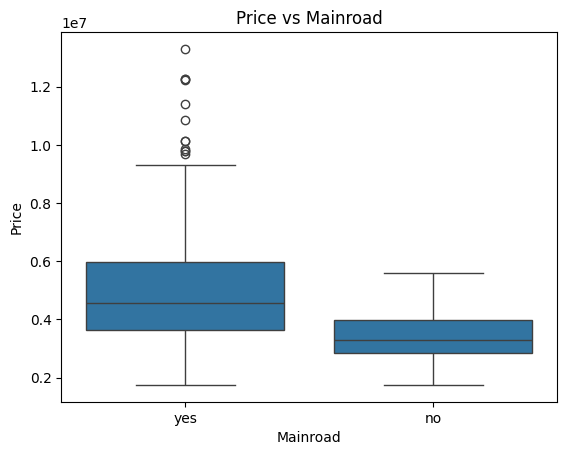

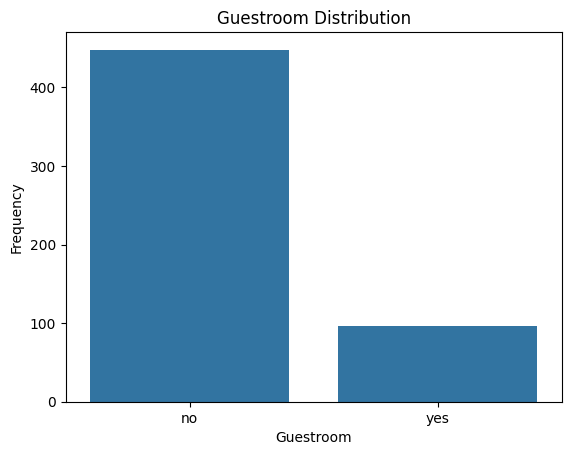

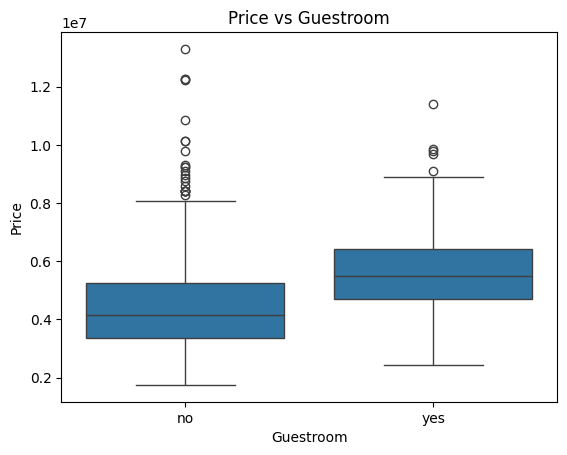

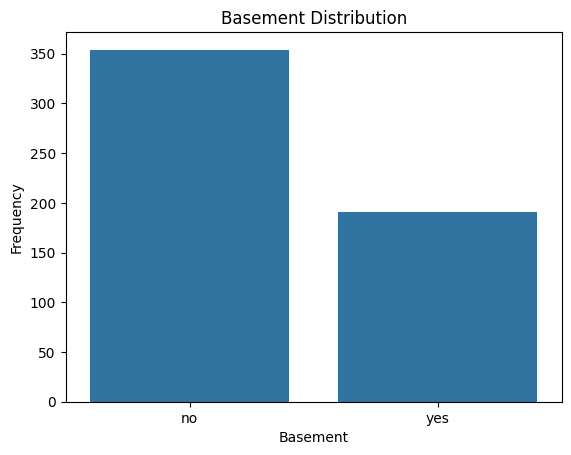

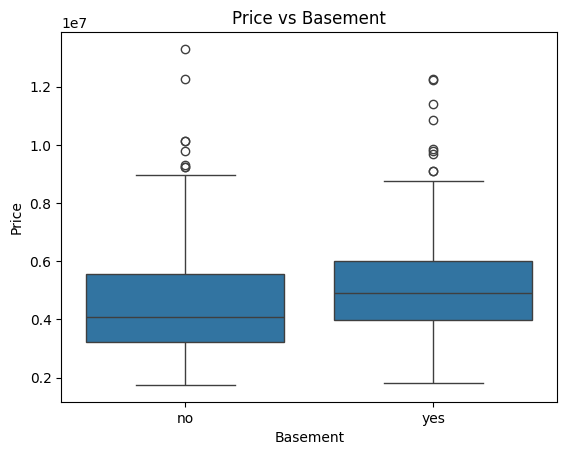

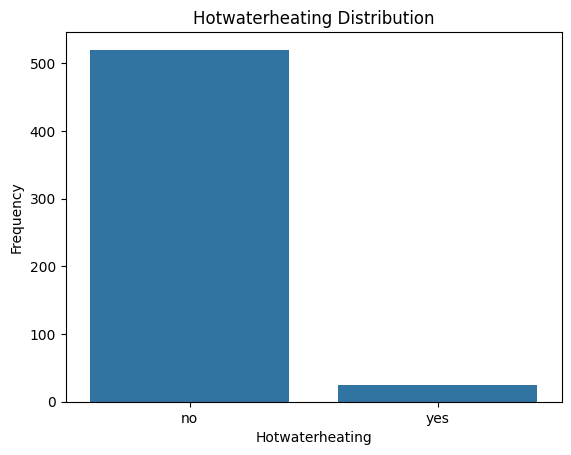

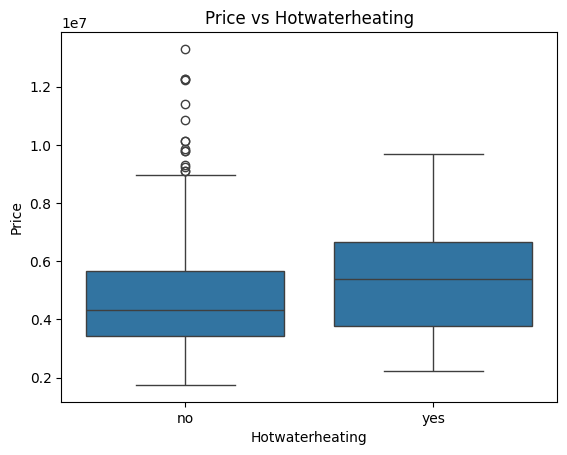

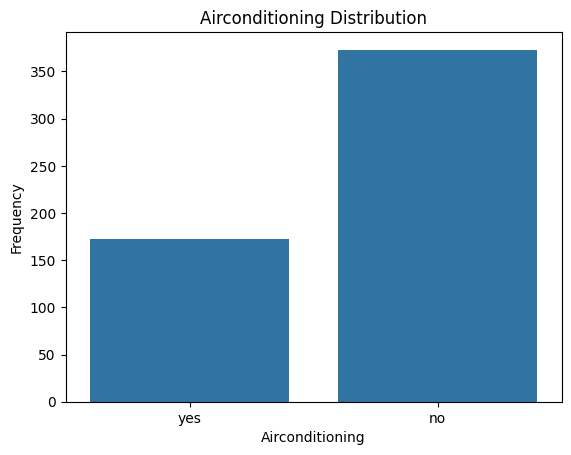

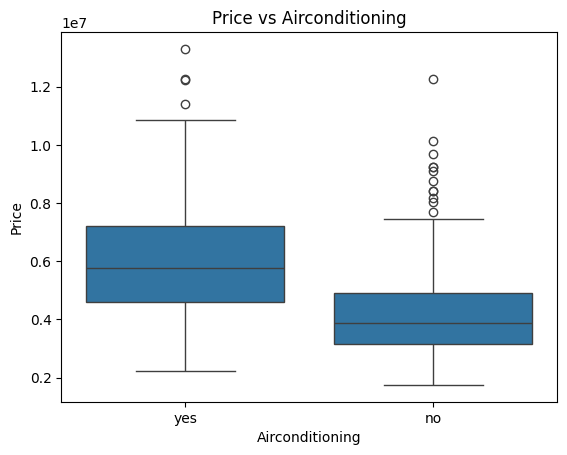

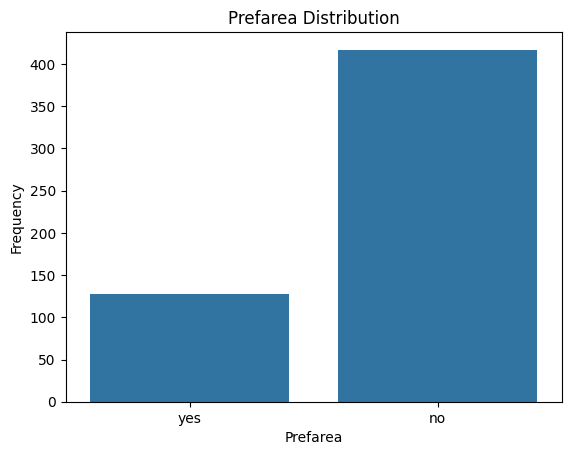

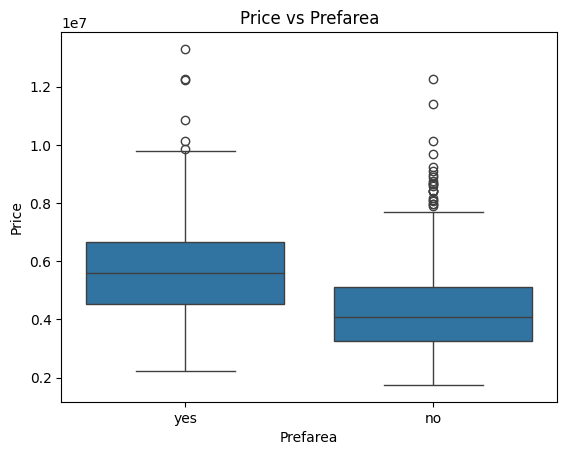

In [8]:
# Bar plots and box plots for categorical features
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.show()

    # Price by category
    sns.boxplot(x=df[col], y=df['price'])
    plt.title(f'Price vs {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Price')
    plt.show()

##### **Outlier Detection**
Outliers can disproportionately influence the model. Boxplots help visualize the presence of outliers in numerical features.

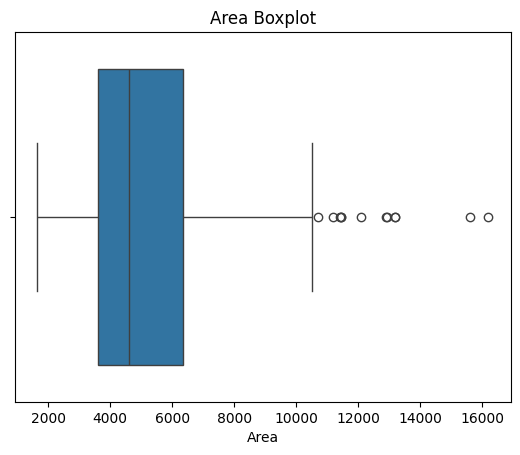

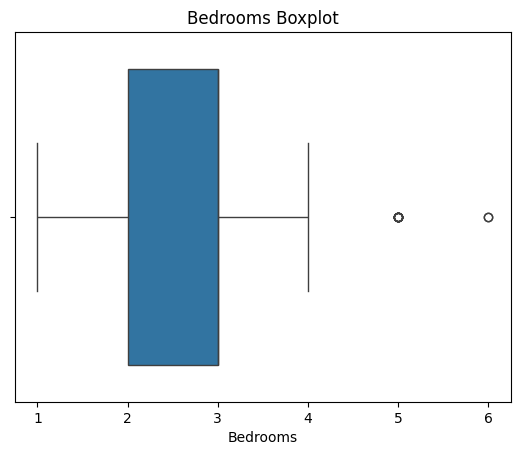

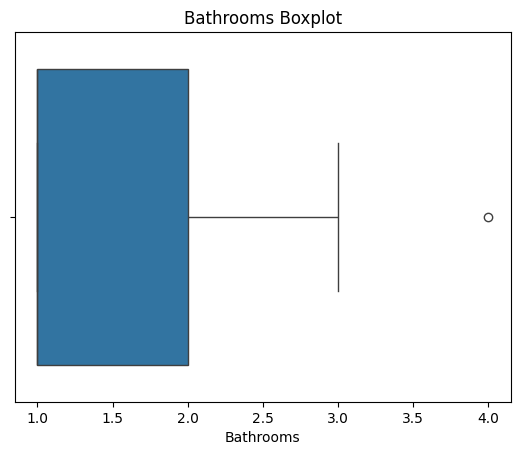

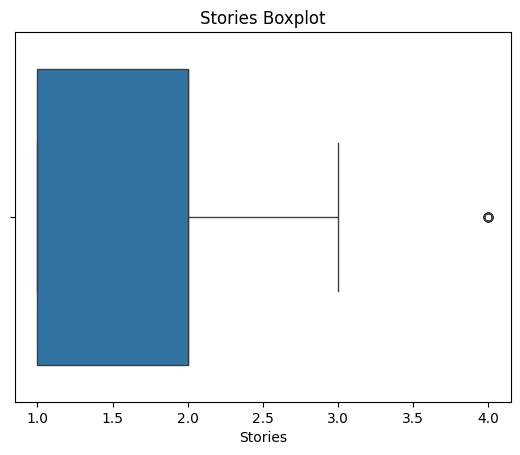

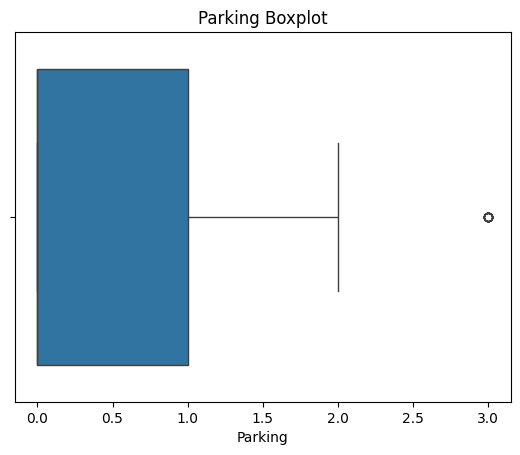

In [9]:
# Box plots for numerical features
for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.title(f'{col.capitalize()} Boxplot')
    plt.xlabel(col.capitalize())
    plt.show()
    

#### **3. Data Preprocessing**

##### **Handle Missing Values**
Missing data can degrade model performance. We check for missing values and handle them appropriately through imputation or removal.

In [10]:
# Check for missing values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


##### **Encode Categorical Variables**
Machine learning algorithms work better with numerical data. Binary variables are encoded as 0/1, and multi-category features are one-hot encoded.

In [11]:
# Convert binary categorical variables to numerical
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)

# One-hot encode the furnishingstatus column
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Confirm changes
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1                       

##### **Feature and Target Separation**
We separate the features (X) from the target variable (y) to prepare the dataset for training.

In [12]:
# Separate features (X) and target variable (y)
X = df.drop(['price'], axis=1)
y = df['price']

print("Feature columns:", X.columns)
print("Target column:", y.name)

Feature columns: Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')
Target column: price


In [21]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
print(feature_importance)


                            Feature   Coefficient
2                         bathrooms  1.094445e+06
8                   airconditioning  7.914267e+05
7                   hotwaterheating  6.846499e+05
10                         prefarea  6.298906e+05
3                           stories  4.074766e+05
6                          basement  3.902512e+05
4                          mainroad  3.679199e+05
5                         guestroom  2.316100e+05
9                           parking  2.248419e+05
1                          bedrooms  7.677870e+04
0                              area  2.359688e+02
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05


#### **4. Train-Test Split**
Splitting the data ensures the model is evaluated on unseen data, which simulates real-world predictions.

In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape[0]} rows")
print(f"Testing data size: {X_test.shape[0]} rows")

Training data size: 436 rows
Testing data size: 109 rows


#### **5. Train the Model**
We use a linear regression model to fit the training data. The model learns the relationship between features and the target variable.

In [15]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  3.67919948e+05  2.31610037e+05  3.90251176e+05  6.84649885e+05
  7.91426736e+05  2.24841913e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]
Intercept: 260032.35760741588


#### **6. Evaluate the Model**

##### **Make Predictions**
Using the trained model, we predict house prices on the test dataset.

In [16]:
# Make predictions
y_pred = model.predict(X_test)

##### **Performance Metrics**
Performance metrics like Mean Squared Error (MSE) and R-squared (R²) evaluate how well the model fits the data.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 1754318687330.6628
R-squared (R²): 0.6529242642153186


In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {scores}")
print(f"Average R²: {scores.mean()}")


Cross-validated R² scores: [ -2.08761653  -5.15625641 -16.34488122 -20.80699862  -5.16406595]
Average R²: -9.911963748665514


#### **7. Visualize Results**

##### **Actual vs. Predicted**
Visualizing the actual vs. predicted values gives insights into model accuracy.

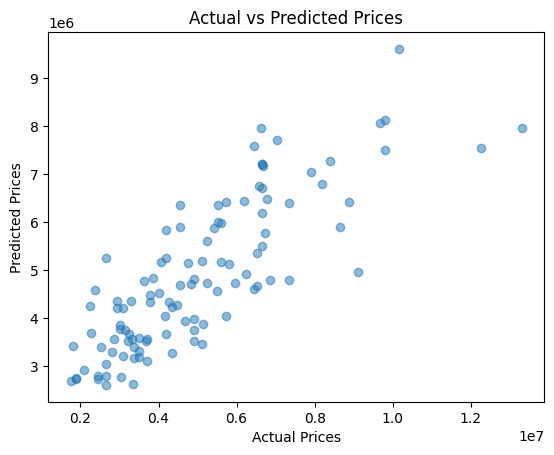

In [18]:
# Scatter plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

##### **Residual Analysis**
Residual analysis helps verify assumptions of linear regression and detect model issues.

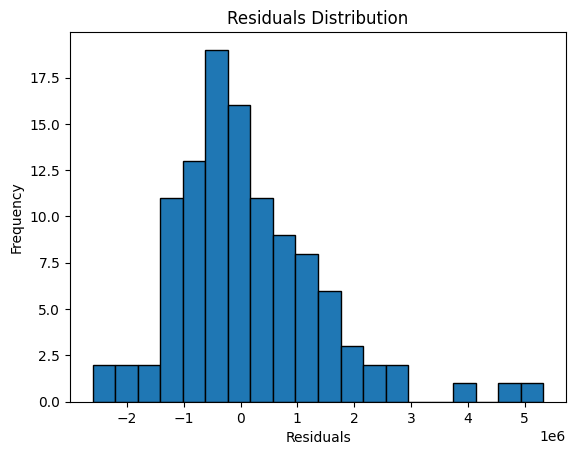

In [19]:
# Histogram of residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

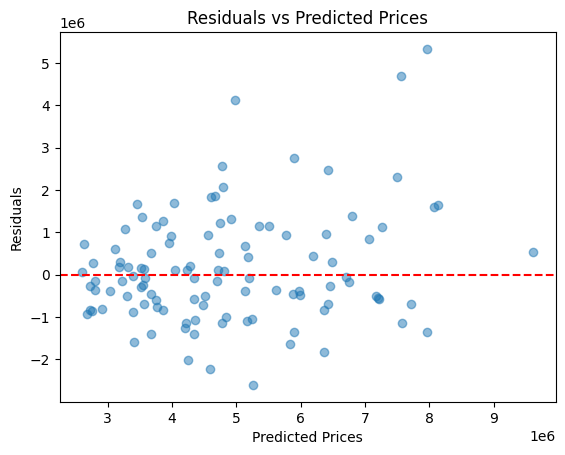

In [23]:
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices")
plt.show()


#### **8. Save the Model (Optional)**
Saving the model allows us to reuse it without retraining.

In [24]:
import joblib

# Save the model
joblib.dump(model, 'linear_regression_model.pkl')

# Load the model
loaded_model = joblib.load('linear_regression_model.pkl')


In [25]:
# Example input data
test_input = {
    'area': 3000,
    'bedrooms': 4,
    'bathrooms': 3,
    'stories': 2,
    'mainroad': 1,
    'guestroom': 0,
    'basement': 1,
    'hotwaterheating': 0,
    'airconditioning': 1,
    'parking': 2,
    'prefarea': 1,
    'furnishingstatus_semi-furnished': 1,
    'furnishingstatus_unfurnished': 0
}

# Convert to DataFrame
test_df = pd.DataFrame([test_input])

# Predict
predicted_price = loaded_model.predict(test_df)
print(f"Predicted Price: {predicted_price[0]:,.2f}")


Predicted Price: 7,875,631.56
